# Test building opt

Import all relevant modules

In [1]:
import os
import time
import pandas as pd
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tsib.timeseriesmanager as tsm
import tsib.buildingopt as bopt
import tsib.buildingmanager as bm
import tsib.buildingconfig as cfg

In [2]:
import copy

In [3]:
import enercore.results as res

In [4]:
import matplotlib.pyplot as plt

In [5]:
VARIANT = 'default_2016'

### 1. Initialize the variation dictionary

In [6]:
startTime = time.time()

Init the building manager

In [7]:
boptmanager = bm.BuildingOptManager(datapath = os.path.join('testresults', 
                                               'buildingresults'),)

Import from building database

In [75]:
ref_results = pd.read_csv(os.path.join('bdgResults_3.csv'), index_col = 0)
ref_results = ref_results.rename(columns={'Age App.': 'buildingYear',
                          'Code_AttachedNeighbours':'surrounding',
                          'n_Apartment': 'n_apartments'})

ref_results['buildingYear'] = ref_results['buildingYear'].astype(int)
ref_results['a_ref_app'] = ref_results['a_ref_app'].astype(float)
ref_results['ownership'] = ref_results['ownership'].astype(bool)
ref_results['buildnew'] = ref_results['buildnew'].astype(bool)
ref_results['n_apartments'] = ref_results['n_apartments'].astype(int)
ref_results['n_persons'] = ref_results['n_persons'].replace(6,5)

ref_results.drop(['app_group'], axis=1, inplace=True)

In [76]:
kwgs = ref_results.loc['N46_add0',:].to_dict()

In [77]:
kwgs['latitude'] = kwgs['latitude'] + 54.
kwgs['longitude'] = kwgs['longitude'] + 8.
kwgs['varyoccupancy'] = 1
kwgs['costdata'] = 'default_2016_debug'
kwgs['refurbishment'] = False

In [78]:
kwgs['roofOrientation'] = 0.0

Get building configurations

In [79]:
bdg = cfg.BuildingConfiguration(kwgs)
bdopt = bopt.BuildingOpt(configurator = bdg  ,integrateBuildingModel = True, 
                        hpLevels = 3, storLevels = 3)

In [80]:
bdopt._initTechSystem()

C:\tools\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


True

In [81]:
bdopt.heatSysExt

True

In [30]:
min(bdopt.nw.getNode('Heat pump').COP_profile)

2.9480648535564855

In [31]:
tmy_data = tsm.TRY2TMY(bdopt.bdg.cfg['weather'])

### 2. Run the optimization

Get Reference

In [69]:
results_ref = bdopt.refCost(threads = 4, solver = 'gurobi', typicalDays = 10 )

C:\tools\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


Changed value of parameter NodeMethod to 2
   Prev: 1  Min: 0  Max: 2  Default: 1
Changed value of parameter OptimalityTol to 1e-08
   Prev: 1e-06  Min: 1e-09  Max: 0.01  Default: 1e-06
Changed value of parameter Threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Changed value of parameter Cuts to 0
   Prev: -1  Min: -1  Max: 3  Default: -1
Changed value of parameter Method to 2
   Prev: -1  Min: -1  Max: 4  Default: -1
Parameter IntFeasTol unchanged
   Value: 1e-05  Min: 1e-09  Max: 0.1  Default: 1e-05
Optimize a model with 31134 rows, 21293 columns and 99867 nonzeros
Variable types: 21248 continuous, 45 integer (45 binary)
Coefficient statistics:
  Matrix range     [7e-07, 5e+02]
  Objective range  [1e-04, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-03, 5e+02]
Presolve removed 19036 rows and 12910 columns
Presolve time: 0.34s
Presolved: 12098 rows, 8383 columns, 42534 nonzeros
Variable types: 8379 continuous, 4 integer (4 binary)
Presolve removed 2 rows and 2 

Get min cost

In [82]:
results_min = bdopt.minCost(solver = 'gurobi', validationRun = False)

C:\tools\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


Parameter NodeMethod unchanged
   Value: 1  Min: 0  Max: 2  Default: 1
Changed value of parameter OptimalityTol to 1e-08
   Prev: 1e-06  Min: 1e-09  Max: 0.01  Default: 1e-06
Changed value of parameter Threads to 3
   Prev: 0  Min: 0  Max: 1024  Default: 0
Parameter Cuts unchanged
   Value: -1  Min: -1  Max: 3  Default: -1
Parameter Method unchanged
   Value: -1  Min: -1  Max: 4  Default: -1
Parameter IntFeasTol unchanged
   Value: 1e-05  Min: 1e-09  Max: 0.1  Default: 1e-05
Optimize a model with 35462 rows, 24585 columns and 113987 nonzeros
Variable types: 24540 continuous, 45 integer (45 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+02]
  Objective range  [1e-04, 2e+03]
  Bounds range     [1e+00, 5e+01]
  RHS range        [2e-03, 5e+02]
Presolve removed 16095 rows and 10398 columns
Presolve time: 0.58s
Presolved: 19367 rows, 14187 columns, 68508 nonzeros
Variable types: 14172 continuous, 15 integer (15 binary)

Root simplex log...

Iteration    Objective       Primal 

Get min CO2

In [14]:
results_exist = boptmanager.getOpti(boptList, case = 'minCO2')

Duration for getting the results: 0.5310001373291016


### 2. Run the optimization

In [11]:
components = ['FiTPV','Electricity supply','Gas supply', 'Gas boiler', 'HP Tarif','Heat pump',
              'ElectricHeater','Photovoltaic 1', 'Battery']

Plot reference results

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


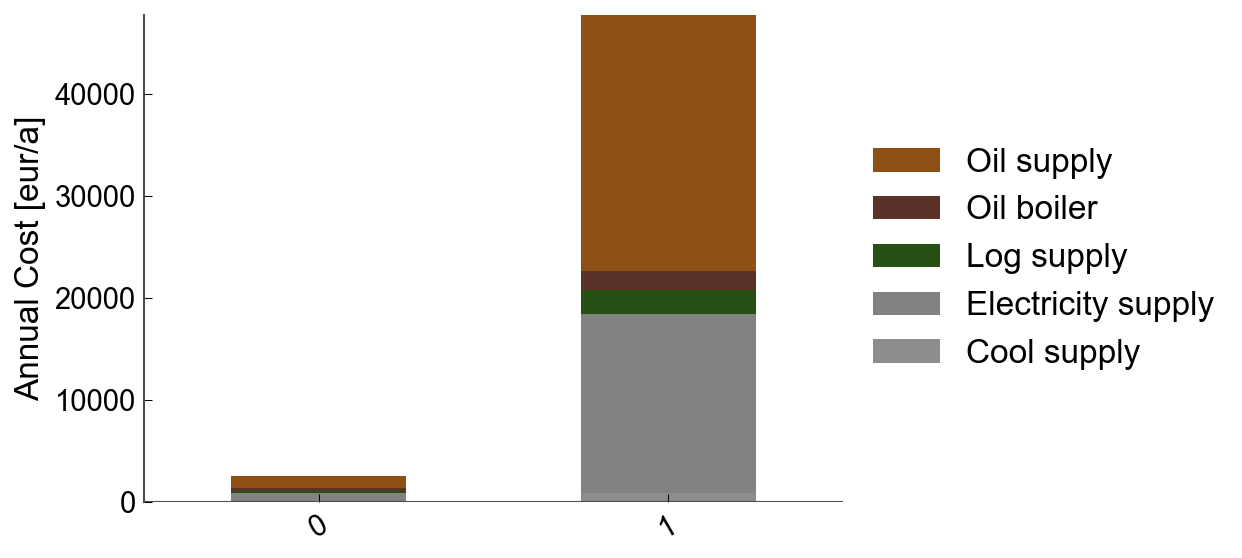

In [15]:
paraResults_ref = res.ParamVarResultManager(paramname = '', colordictionary = bopt.BuildingOpt.COLOR_DICT, 
                                        results = results_ref)
ax = plt.subplot(1,1,1)
paraResults_ref.plotNodeRes(parameters=['Annual Cost'], 
              plottype='bar',ylabel='Annual Cost [eur/a]',stacked=True, linewidth=0, labelrotation=30,
                    showValues = False,ax = ax)

Plot min cost results

In [16]:
paraResults_min = res.ParamVarResultManager(paramname = '', colordictionary = bopt.BuildingOpt.COLOR_DICT, 
                                        results = results_min)
ax = plt.subplot(1,1,1)
paraResults_min.plotNodeRes(parameters=['Annual Cost'], 
              plottype='bar',ylabel='Annual Cost [eur/a]',stacked=True, linewidth=0, labelrotation=30,
                    showValues = False,ax = ax)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


Plot CO2 min results

In [17]:
results_exist

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


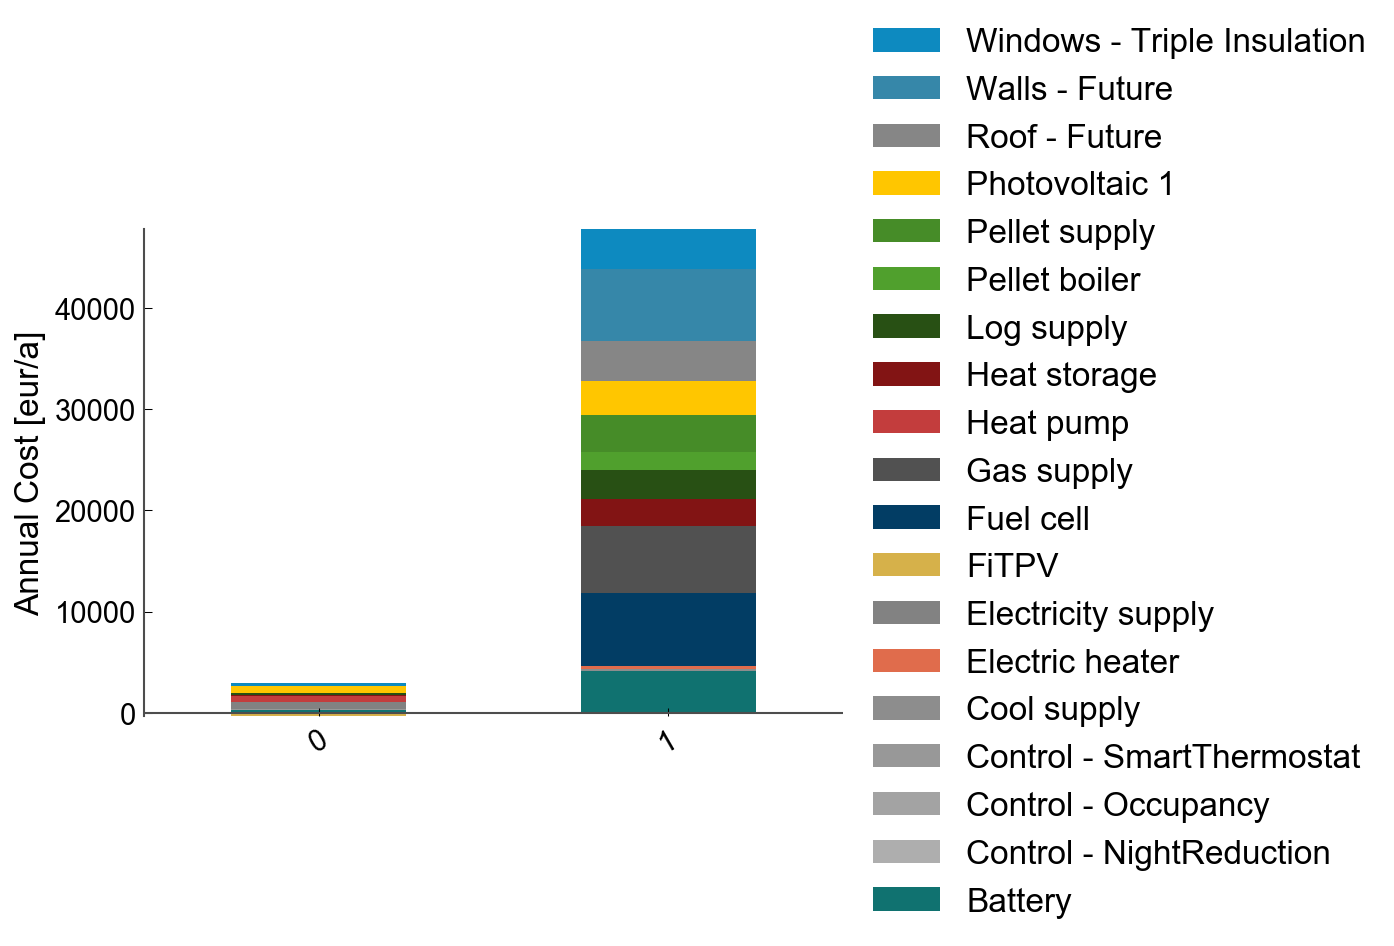

In [18]:
paraResults_CO2 = res.ParamVarResultManager(paramname = '', colordictionary = bopt.BuildingOpt.COLOR_DICT, 
                                        results = results_exist)
ax = plt.subplot(1,1,1)
paraResults_CO2.plotNodeRes(parameters=['Annual Cost'], 
              plottype='bar',ylabel='Annual Cost [eur/a]',stacked=True, linewidth=0, labelrotation=30,
                    showValues = False,ax = ax)

Show detailed results for the second building

In [20]:
resu = results_exist[0]

In [33]:
resu.loads[[col for col in resu.nodes if 'Heat storage' in col]].max()

Heat storage                   0.000000
Heat storage 33.3333333333     0.000000
Heat storage 41.6666666667     0.000000
Heat storage 50.0             14.070141
dtype: float64

In [34]:
resu.loads[[col for col in resu.nodes if 'Heat pump' in col]].max()

Heat pump                  0.000000
Heat pump 33.3333333333    2.418269
Heat pump 41.6666666667    2.418269
Heat pump 50.0             2.418269
dtype: float64

In [36]:
resu.flows[[col for col in resu.flows if 'Heat storage 50.0' in col]].max()

HNode 50.0 to Heat storage 50.0        40.626667
Heat pump 50.0 to Heat storage 50.0     2.418269
Heat storage 50.0 to HNode 50.0        40.626667
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


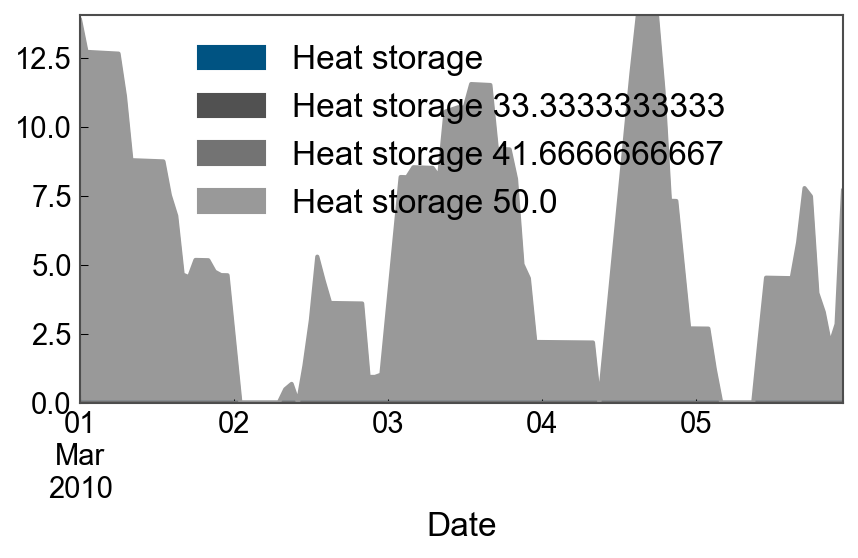

In [31]:
resu.loads[[col for col in resu.nodes if 'Heat storage' in col]]['20100301':'20100305'].plot(kind ='area')

In [28]:
resu.nodes[[col for col in resu.nodes if 'Heat storage' in col]]

,Heat storage,Heat storage 33.3333333333,Heat storage 41.6666666667,Heat storage 50.0
Value,,,,
CAPEX,1527.623600,0.000000,0.000000,0.000000
CO2-Emissions,0.000000,0.000000,0.000000,0.000000
Capacity,0.606353,785.602928,785.602928,1885.447028
Curtailment,0.000000,0.000000,0.000000,0.000000
Energy supply,0.000000,0.000000,0.000000,0.000000
Final energy,0.000000,0.000000,0.000000,0.000000
FixCost,87.728171,0.000000,0.000000,0.000000
OPEX,0.000000,0.000000,0.000000,0.000000
OPEX fix,0.000000,0.000000,0.000000,0.000000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


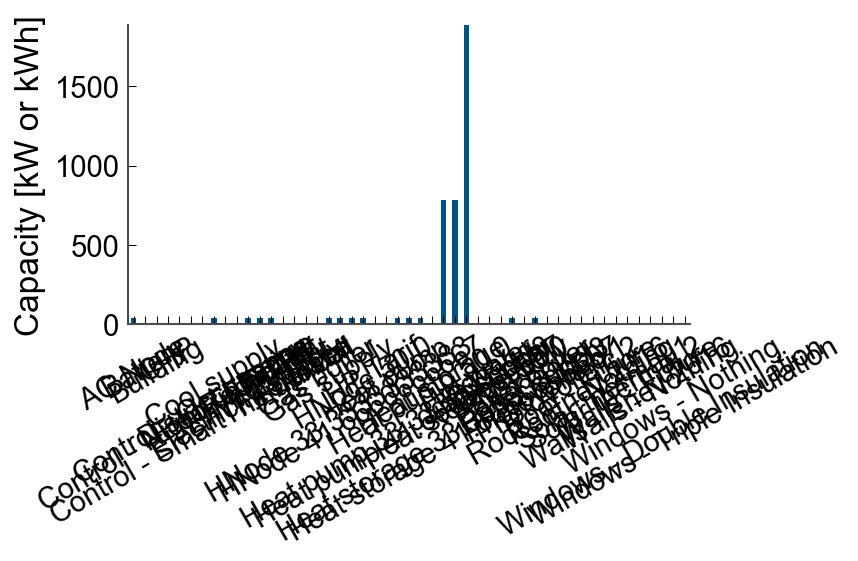

In [22]:
resu.showCapacities()

In [17]:
res = results_a[1]

In [18]:
res.nodes.columns

Index(['AC Node', 'Battery', 'Building', 'CHP', 'Control - NightReduction',
       'Control - Occupancy', 'Control - SmartThermostat', 'Cool supply',
       'District heating', 'Electric heater', 'Electricity supply',
       'Environment', 'FiTCHP', 'FiTPV', 'Fire place', 'Fuel cell',
       'Gas boiler', 'Gas supply', 'HNode 41.6666666667',
       'HNode 58.3333333333', 'HNode 75.0', 'HP Tarif', 'Heat pump',
       'Heat pump 41.6666666667', 'Heat pump 58.3333333333', 'Heat pump 75.0',
       'Heat storage', 'Heat storage 41.6666666667',
       'Heat storage 58.3333333333', 'Heat storage 75.0', 'Hot water',
       'Log supply', 'Oil boiler', 'Oil supply', 'Pellet boiler',
       'Pellet supply', 'Photovoltaic 1', 'Photovoltaic 2', 'Roof - Enev 2016',
       'Roof - Future', 'Roof - Nothing', 'Solar thermal 1', 'Solar thermal 2',
       'Walls - Enev 2016', 'Walls - Future', 'Walls - Nothing',
       'Windows - Double Insulation', 'Windows - Nothing',
       'Windows - Triple Insulatio

In [19]:
res.flows

,AC Node to Battery,AC Node to Building,AC Node to Electric heater,AC Node to Heat pump,AC Node to Heat pump 41.6666666667,AC Node to Heat pump 58.3333333333,AC Node to Heat pump 75.0,Battery to AC Node,CHP to AC Node,CHP to FiTCHP,...,Oil boiler to HNode 75.0,Oil supply to Oil boiler,Pellet boiler to HNode 75.0,Pellet supply to Pellet boiler,Photovoltaic 1 to AC Node,Photovoltaic 1 to FiTPV,Photovoltaic 2 to AC Node,Photovoltaic 2 to FiTPV,Solar thermal 1 to HNode 75.0,Solar thermal 2 to HNode 75.0
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,0.0,1.354409,0.0,0.0,10.680067,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 01:00:00,0.0,3.369957,0.0,0.0,10.976985,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 02:00:00,0.0,5.764253,0.0,0.0,9.048345,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 03:00:00,0.0,2.728799,0.0,0.0,11.246911,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 04:00:00,0.0,3.351570,0.0,0.0,11.246911,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 05:00:00,0.0,4.543531,0.0,0.0,10.269068,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 06:00:00,0.0,3.099967,0.0,0.0,11.219918,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 07:00:00,0.0,5.778736,0.0,0.0,9.033863,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-01 08:00:00,0.0,14.314589,0.0,0.0,0.498010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
nodename = 'Heat storage'


indict={}
incomplist=[]
outdict={}
outcomplist=[]

for column in res.flows.columns:
    FromTo=column.split(' to ')
    if nodename in FromTo[0] and not nodename in FromTo[1]:
                    # drop zero columns
        if (res.flows[column] > 0).any():
            outdict[FromTo[1]]=res.flows[column].values
#                   fulldict[FromTo[1]]=-self.flows[column].values
            outcomplist.append(FromTo[1])
#                   fullcomplist.append(FromTo[1])
    elif nodename in FromTo[1] and not nodename in FromTo[0]:
        if (res.flows[column] > 0).any():
            indict[FromTo[0]]=res.flows[column].values
#                   fulldict[FromTo[0]]=self.flows[column].values
            incomplist.append(FromTo[0])

In [30]:
incomplist

['HNode 75.0', 'Heat pump 75.0']

In [29]:
outcomplist

['HNode 75.0']

In [21]:
res.nodes['Heat storage']

Value
CAPEX             3315.654800
CO2-Emissions        0.000000
Capacity             2.096379
Curtailment          0.000000
Energy supply        0.000000
Final energy         0.000000
FixCost            259.372794
OPEX                 0.000000
OPEX fix             0.000000
OPEX var             0.000000
Primary energy       0.000000
VarCost              0.000000
Period Cost        259.372794
Annual Cost        259.372794
Name: Heat storage, dtype: float64

In [22]:
'Heat storage 75.0'

'Heat storage 75.0'

In [27]:
res.nodes.columns

Index(['AC Node', 'Battery', 'Building', 'CHP', 'Control - NightReduction',
       'Control - Occupancy', 'Control - SmartThermostat', 'Cool supply',
       'District heating', 'Electric heater', 'Electricity supply',
       'Environment', 'FiTCHP', 'FiTPV', 'Fire place', 'Fuel cell',
       'Gas boiler', 'Gas supply', 'HNode 41.6666666667',
       'HNode 58.3333333333', 'HNode 75.0', 'HP Tarif', 'Heat pump',
       'Heat pump 41.6666666667', 'Heat pump 58.3333333333', 'Heat pump 75.0',
       'Heat storage', 'Heat storage 41.6666666667',
       'Heat storage 58.3333333333', 'Heat storage 75.0', 'Hot water',
       'Log supply', 'Oil boiler', 'Oil supply', 'Pellet boiler',
       'Pellet supply', 'Photovoltaic 1', 'Photovoltaic 2', 'Roof - Enev 2016',
       'Roof - Future', 'Roof - Nothing', 'Solar thermal 1', 'Solar thermal 2',
       'Walls - Enev 2016', 'Walls - Future', 'Walls - Nothing',
       'Windows - Double Insulation', 'Windows - Nothing',
       'Windows - Triple Insulatio

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


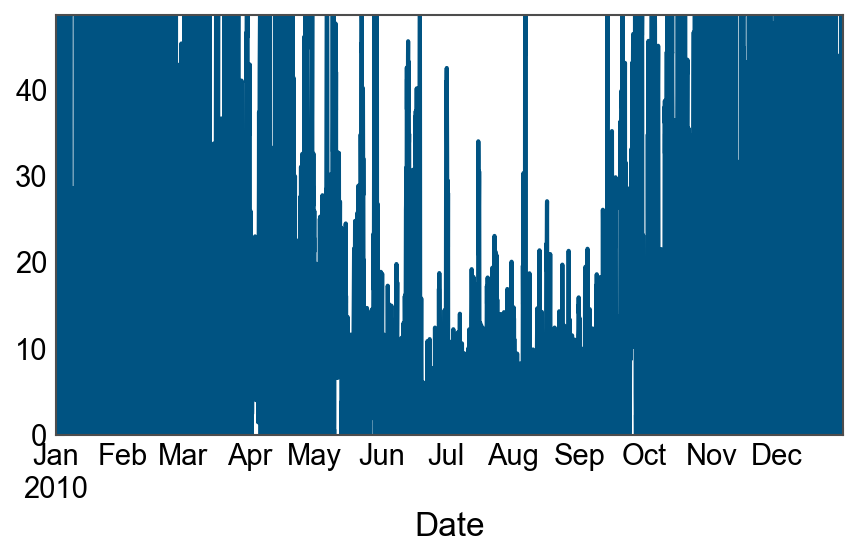

In [23]:
res.loads['Heat storage 75.0'].plot()

In [24]:
incomplist

['HNode 75.0', 'Heat pump 75.0']

In [25]:
outcomplist

['HNode 75.0']

In [26]:
res.flows['HNode 50.0 to Heat storage 50.0']

KeyError: 'HNode 50.0 to Heat storage 50.0'

In [ ]:
boptList[1].nw?

In [ ]:
boptList[1]._initTechSystem()

In [ ]:
nw = boptList[1].nw

In [ ]:
nw.getNode('Heat storage 50.0')

In [ ]:
boptList[1].nw.draw(iconScale = 0.1,)

In [ ]:
import networkx

In [ ]:
networkx.draw?

In [ ]:
networkx.draw(nw)